In [1]:
#Función para trabajar con archivos de google drive desde colab
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [59]:
import pandas as pd, numpy as np #Se carga el archivo .csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/mushrooms.csv') 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
#Revisar los tipos de datos de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [61]:
#Observar algunas características de los atributos
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [62]:
#Revisar el número de atributos e instancias
df.shape

(8124, 23)

In [63]:
#Obtener las únicas ocurrencias en el atributo clase
df['class'].unique()

array(['p', 'e'], dtype=object)

In [64]:
df['class'].value_counts() #4208 comestibles y 3916 venenosos

e    4208
p    3916
Name: class, dtype: int64

In [65]:
#Revisar los datos faltantes
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [66]:
df['stalk-root'].value_counts() #2480 valores faltantes

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


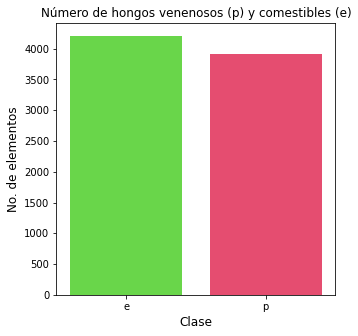

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns 

count = df['class'].value_counts() #Gráfica del atributo de decisión
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('No. de elementos', fontsize=12)
plt.xlabel('Clase', fontsize=12)
plt.title('Número de hongos venenosos (p) y comestibles (e)')
#plt.savefig("mushrooms.png", format='png', dpi=80)
plt.show()

In [68]:
#Dividir las características y el atributo de decisión
X = df.loc[:, df.columns != "class"]
y = df["class"]

In [69]:
#Prueba de hipótesis usando la prueba Chi-cuadrada 
#H0:  A and B son independientes 
#H1:  A and B son independientes
import scipy
from scipy.stats import chi2_contingency
# Se define el valor de alfa
alpha = 0.05

for col in X.columns.values:
    A, B = df[col], df["class"]
    dfObserved = pd.crosstab(A, B) 
    chi2, p, dof, expected = scipy.stats.chi2_contingency(dfObserved.values)
    if p < alpha:
        # Rechazar la hipótesis nula
        print("{} es importante. (p = {})".format(col, p))
    else:
        # Aceptar la hipótesis nula
        print("{} no es importante. (p = {})".format(col, p))

cap-shape es importante. (p = 1.196456568593578e-103)
cap-surface es importante. (p = 5.518427038649143e-68)
cap-color es importante. (p = 6.055814598336574e-78)
bruises es importante. (p = 0.0)
odor es importante. (p = 0.0)
gill-attachment es importante. (p = 5.501707411861009e-31)
gill-spacing es importante. (p = 5.0229776137324786e-216)
gill-size es importante. (p = 0.0)
gill-color es importante. (p = 0.0)
stalk-shape es importante. (p = 4.604746212155192e-20)
stalk-root es importante. (p = 7.702047904943513e-290)
stalk-surface-above-ring es importante. (p = 0.0)
stalk-surface-below-ring es importante. (p = 0.0)
stalk-color-above-ring es importante. (p = 0.0)
stalk-color-below-ring es importante. (p = 0.0)
veil-type no es importante. (p = 1.0)
veil-color es importante. (p = 3.320972749169678e-41)
ring-number es importante. (p = 4.23575764172306e-82)
ring-type es importante. (p = 0.0)
spore-print-color es importante. (p = 0.0)
population es importante. (p = 0.0)
habitat es importante

In [70]:
# Eliminación de la columna veil type
df= df.drop(["veil-type"], axis=1)
X = X.drop(["veil-type"], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


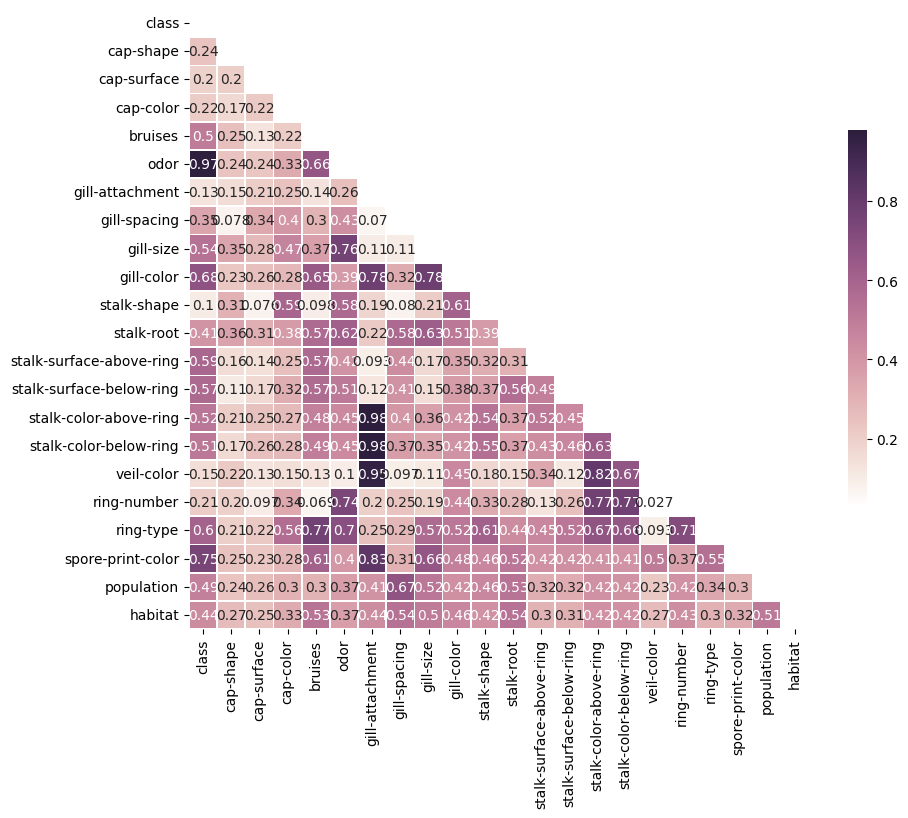

In [71]:
#Asociación V de Cramer
import seaborn as sns
import itertools
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

def cramers_corrected_stat(confusion_matrix):
    chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
cols = list(df.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calcular correlaciones de cada combinación de variables
for col1, col2 in itertools.combinations(cols, 2):
    A, B = df[col1], df[col2]
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(A,B) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Máscara para obtener triángulo inferior
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# Dibujar el mapa de calor con la máscara.
fig = plt.figure(figsize=(10, 10),dpi=100)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

###Revisar y modificar las características

In [72]:
#Revisión del tipo de datos de los atributos
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [73]:
#Convertir los datos categóricos a numéricos
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for column in list(df.columns):
    df[column] = Le.fit_transform(df[column])

In [74]:
df.dtypes #Revisión del tipo de datos deacuerdo 

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

###Training the model

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

def testing(X_train,y_train, X_test, y_test,verbose=False):
  y_pred=[] 
  dt = DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  y_pred = dt.predict(X_test)
  cm = confusion_matrix(y_test, np.array(y_pred))
  cm = pd.DataFrame(cm) #Matriz de confusión
  #Reporte de clasificación
  report = classification_report(y_test, np.array(y_pred), output_dict=True)
  precision =  report['macro avg']['precision'] 
  recall = report['macro avg']['recall']    
  accuracy = report['accuracy']
  f1 = report['macro avg']['f1-score']
  if verbose:
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='g', annot_kws={'size':10}, cmap="Blues")
    plt.title('Matriz de confusión')
    plt.ylabel('Valores Reales')
    plt.xlabel('Valores predecidos')
    plt.show()
  return precision,recall,accuracy,f1

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

def kParticiones_KM(particiones, X, y):
    metricas_k=pd.DataFrame(columns=['accuracy', 'precision', 'recall','f1-score'], index=(range(1,particiones+1)))
    kf = KFold(n_splits=particiones, shuffle=True)
    p = [];  r = []; a = []; funo = [];
    for train_index, test_index in kf.split(X):# K-PARTICIONES 
        X_train=X[train_index] #Se generan los indices de las particiones
        X_test=X[test_index]
        y_train=y[train_index]
        y_test=y[test_index]
        pr,rec,acc,f1 = testing(X_train,y_train, X_test, y_test) #Se prueba el modelo
        p.append(pr) #Metricas
        r.append(rec)
        a.append(acc)
        funo.append(f1)
    metricas_k['accuracy']=a; metricas_k['precision']=p;metricas_k['recall']=r;metricas_k['f1-score']=funo;
    precision=np.mean(p) #Metricas después de la validación
    recall=np.mean(r)
    accuracy=np.mean(a)
    f1_score=np.mean(funo)
    return precision,recall,accuracy,f1_score,metricas_k

In [77]:
#Se manda llamar la función para hacer la validación k-fold
Particiones=5 #K-fold
X = df.drop(['class'], axis=1)
y = df['class']
y=np.array(y) #Etiquetas
X=np.array(X) #Conjunto de entrenamiento
precision_k5,recall_k5,accuracy_k5,f1_score_k5, metricas_k = kParticiones_KM(Particiones, X, y)
print('Métricas por experimento')
print(metricas_k)
print('Promedio de las métricas')
print('Precision: ',precision_k5)
print('Recall: ',recall_k5)
print('Accuracy: ',accuracy_k5)
print('f1 score: ',f1_score_k5)

Métricas por experimento
   accuracy  precision  recall  f1-score
1       1.0        1.0     1.0       1.0
2       1.0        1.0     1.0       1.0
3       1.0        1.0     1.0       1.0
4       1.0        1.0     1.0       1.0
5       1.0        1.0     1.0       1.0
Promedio de las métricas
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
f1 score:  1.0
